In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from flask import Flask

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract

In [6]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

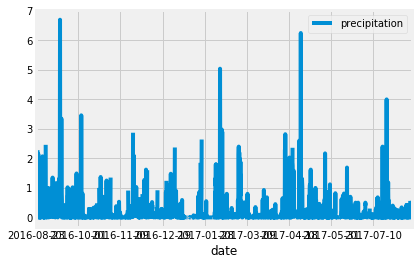

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days =365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
df = df.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [11]:
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations?

# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

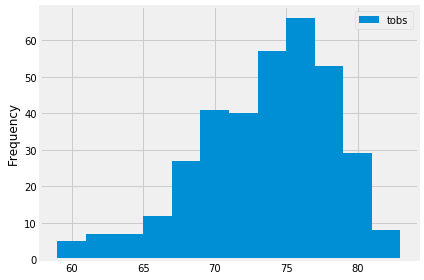

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

print(results)

df = pd.DataFrame(results, columns=['tobs'])
print(df)

df.plot.hist(bins=12)
plt.tight_layout()

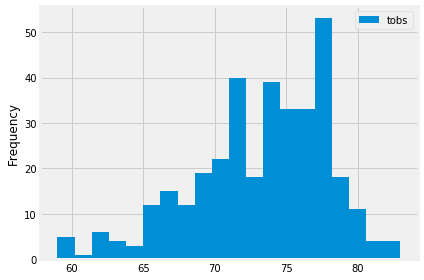

In [17]:
df.plot.hist(bins=20)
plt.tight_layout()

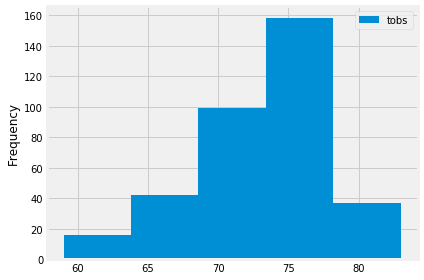

In [18]:
df.plot.hist(bins=5)
plt.tight_layout()

In [19]:
#app = Flask(__name__)

In [20]:
#@app.route('/')
#def hello_world():
#    return 'Hello world'

In [21]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

## June Data

[('2010-07-01', 75.0, 0.01), ('2010-07-02', 77.0, 0.05), ('2010-07-03', 77.0, 0.09), ('2010-07-04', 78.0, 0.05), ('2010-07-05', 78.0, 0.06), ('2010-07-06', 76.0, 0.08), ('2010-07-07', 74.0, 0.08), ('2010-07-08', 76.0, 0.03), ('2010-07-09', 74.0, 0.06), ('2010-07-10', 76.0, 0.09), ('2010-07-11', 78.0, 0.0), ('2010-07-12', 77.0, 0.0), ('2010-07-13', 80.0, 0.0), ('2010-07-16', 78.0, None), ('2010-07-17', 76.0, 0.02), ('2010-07-18', 77.0, 0.0), ('2010-07-19', 77.0, 0.04), ('2010-07-21', 80.0, 0.0), ('2010-07-22', 78.0, 0.0), ('2010-07-24', 80.0, 0.0), ('2010-07-25', 79.0, 0.0), ('2010-07-26', 78.0, 0.0), ('2010-07-27', 79.0, 0.0), ('2010-07-28', 78.0, 0.0), ('2010-07-29', 79.0, 0.0), ('2010-07-30', 78.0, 0.0), ('2010-07-31', 77.0, 0.02), ('2011-07-01', 77.0, 0.05), ('2011-07-02', 78.0, 0.02), ('2011-07-03', 78.0, 0.0), ('2011-07-04', 78.0, 0.0), ('2011-07-05', 78.0, 0.01), ('2011-07-06', 76.0, 0.01), ('2011-07-07', 76.0, 0.01), ('2011-07-08', 77.0, 0.0), ('2011-07-09', 77.0, 0.03), ('2011-

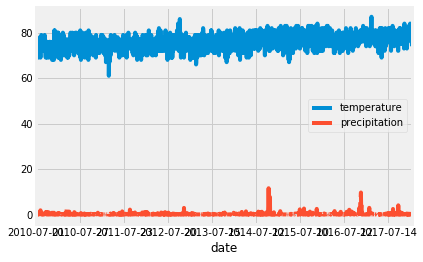

In [68]:
# Design a query to retrieve a history of temperature and precipitation data for the month of June and plot the results. 

# Perform a query to retrieve the data and precipitation scores
june_results = []

june_results = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 7).all()
                                                               
print(june_results)

# Save the query results as a Pandas DataFrame and set the index to the date column
june_results_df = pd.DataFrame(june_results, columns=['date', 'temperature', 'precipitation'])
june_results_df.set_index(june_results_df['date'], inplace=True)

# Sort the dataframe by date
june_results_df = june_results_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
june_results_df.plot()

In [69]:
print(june_results_df.to_string(index=False))

       date  temperature  precipitation
 2010-07-01         75.0           0.01
 2010-07-01         71.0           0.02
 2010-07-01         73.0           0.00
 2010-07-01         73.0           0.09
 2010-07-01         74.0           0.13
 2010-07-01         73.0           0.00
 2010-07-01         70.0           0.44
 2010-07-01         73.0           0.01
 2010-07-02         71.0           0.23
 2010-07-02         69.0           0.32
 2010-07-02         69.0           0.70
 2010-07-02         74.0           0.02
 2010-07-02         72.0           0.14
 2010-07-02         77.0           0.05
 2010-07-02         70.0           0.20
 2010-07-02         74.0           0.14
 2010-07-03         73.0           0.84
 2010-07-03         78.0            NaN
 2010-07-03         72.0           0.38
 2010-07-03         73.0           0.16
 2010-07-03         69.0           1.81
 2010-07-03         76.0           0.09
 2010-07-03         77.0           0.09
 2010-07-03         75.0           0.06


In [70]:
# Use Pandas to calcualte the summary statistics for the precipitation data
june_results_df.describe()

,temperature,precipitation
count,1711.000000,1569.000000
mean,76.082408,0.167922
std,3.356532,0.625977
min,61.000000,0.000000
25%,74.000000,0.000000
50%,76.000000,0.020000
75%,78.000000,0.120000
max,87.000000,11.530000


## December Data

[('2010-12-01', 76.0, 0.04), ('2010-12-03', 74.0, 0.0), ('2010-12-04', 74.0, 0.0), ('2010-12-06', 64.0, 0.0), ('2010-12-07', 64.0, 0.0), ('2010-12-08', 67.0, 0.0), ('2010-12-09', 77.0, 0.0), ('2010-12-10', 66.0, 1.58), ('2010-12-11', 69.0, 0.77), ('2010-12-12', 68.0, 0.0), ('2010-12-13', 68.0, 0.0), ('2010-12-14', 71.0, 0.0), ('2010-12-15', 74.0, 0.0), ('2010-12-16', 67.0, 0.0), ('2010-12-17', 66.0, 0.0), ('2010-12-18', 69.0, 0.0), ('2010-12-19', 71.0, 1.4), ('2010-12-23', 70.0, 0.0), ('2010-12-24', 70.0, 0.0), ('2010-12-26', 74.0, None), ('2010-12-27', 74.0, 0.13), ('2010-12-28', 71.0, 0.55), ('2010-12-29', 75.0, 0.06), ('2010-12-30', 75.0, 0.01), ('2010-12-31', 72.0, 0.0), ('2011-12-01', 69.0, 0.03), ('2011-12-02', 68.0, 0.08), ('2011-12-03', 73.0, 0.0), ('2011-12-04', 74.0, 0.0), ('2011-12-05', 73.0, 0.0), ('2011-12-06', 73.0, 0.0), ('2011-12-07', 73.0, 0.0), ('2011-12-08', 73.0, 0.0), ('2011-12-09', 71.0, 0.13), ('2011-12-10', 73.0, 0.07), ('2011-12-11', 73.0, 0.07), ('2011-12-12',

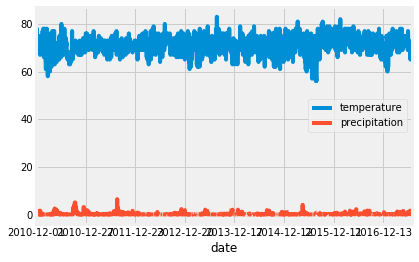

In [71]:
# Design a query to retrieve a history of temperature and precipitation data for the month of December and plot the results. 

# Perform a query to retrieve the data and precipitation scores
december_results = []


december_results = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
                                                               
print(december_results)

# Save the query results as a Pandas DataFrame and set the index to the date column
december_results_df = pd.DataFrame(december_results, columns=['date', 'temperature', 'precipitation'])
december_results_df.set_index(december_results_df['date'], inplace=True)

# Sort the dataframe by date
december_results_df = december_results_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
december_results_df.plot()

In [72]:
print(december_results_df.to_string(index=False))

       date  temperature  precipitation
 2010-12-01         76.0           0.04
 2010-12-01         73.0           0.03
 2010-12-01         72.0           0.70
 2010-12-01         78.0           0.03
 2010-12-01         72.0           1.35
 2010-12-01         70.0           0.13
 2010-12-01         71.0           1.48
 2010-12-01         73.0           0.76
 2010-12-02         71.0            NaN
 2010-12-02         71.0           0.16
 2010-12-02         73.0           0.06
 2010-12-02         75.0           0.26
 2010-12-02         74.0           0.00
 2010-12-02         72.0           0.13
 2010-12-02         74.0           0.02
 2010-12-02         70.0           0.18
 2010-12-03         67.0           1.59
 2010-12-03         74.0           0.01
 2010-12-03         70.0           0.78
 2010-12-03         74.0           0.00
 2010-12-03         71.0           0.22
 2010-12-03         74.0           0.01
 2010-12-03         72.0           0.47
 2010-12-03         73.0           0.16


In [74]:
# Use Pandas to calcualte the summary statistics for the precipitation data
december_results_df.describe()

,temperature,precipitation
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


## Findings

Over the years June has 1711 temperature and 1569 precipitation data points while December has 1571 and 1405 by comparison. While this is a substatial volume regardless of the month, one might expect a higher degree of confidence with the statistics with the greater June data volume. 

Oahu's June is warmer and drier than December.<br> 
On average, June is ~5 degrees F warmer than December though both average higher than 70 degrees. <br> 
Expect over 0.2" of rain in December while in Oahu. June can be damp too, but usually 25% less (0.17"). 

As expected, December has lower minimum (D: 56F vs J: 61F) and lower maximum temperatures (D: 71F vs J: 76F). December's temperature volalitilty (3.75) is slightly higher than June (3.36), but both are between 3-4 degrees. 

The 25%, 50% and 75% temperature percentiles for June are 74F, 76F and 78F and for December are 69F, 71F and 74F. 

For precipitation, despite having a lower average daily precip, June has a higher standard devation(J: 0.63 vs D: 0.54), possibly due to a maximum rainfall event (11.53") nearly 2x the December maximum (6.42"). 

The 25%, 50% and 75% precipitation percentiles for June are 0.00", 0.02" and 0.12" and for December are 0.00", 0.03" and 0.15". 
Both June and December precip mins are 0.00"

## Recommendations

Current analysis considers all temperature and precipitation data collected at all stations for the entire months of June and July. As W. Avy is gaining confidence regarding seasonality differences, it would be valuable to share differences at the various stations on the island. It's conceivable that some stations may be mountainous and may distort the data with higher precipitation volumes or lower temperature recordings. 

Plotting the temp and precip data may provide understanding of the shape of the data (skewness & kurtosis). For example, December has higher average precip as well as 25%, 50%, and 75% percentiles while the June max rainfall is nearly 2x December's maximium. It would be interesting to understand if that is just a weird freak storm that only occured one time in one location or if that is something W. Avy should be aware of as a risk. 

Understanding the behavior of ice cream purchasers is pretty straightforward. Sales improve on warm, sunny days. What needs further clarification is if the best surfing weather is the same as the best ice cream buying behavior. A possibly next step is understanding what is the best surfing conditions (i.e. is it possible that cooler temps are more conducive for big waves?). If so, this may help identify a potential store location through additional station analysis as that's where all the hungry surfers may be. 